In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\GXN0LA4\Anaconda3\envs\digsML\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Exploration

In [89]:
df = pd.read_csv('cereal.csv')
df.shape

(77, 16)

In [90]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [91]:
# Drop 'shelf' and 'cups' columns - not needed for analysis
df.drop(columns=['shelf','cups'], inplace=True)

In [92]:
# Notice that there are different serving portions in weight (ounces)
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,1.029610,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.150477,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.500000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,1.000000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,93.704912


In [93]:
# Normalize each cereal metric to 1 ounce weight
metrics = ['calories', 'protein', 'fat', 'sodium', 'fiber','carbo', 'sugars', 'potass', 'vitamins']
for i,row in df.iterrows():
    weight = row['weight']
    if weight == 1:
        continue    
    # Adjust metrics
    delta_weight = 1 - weight
    row[metrics] = row[metrics] + row[metrics]*delta_weight
    row['weight'] = 1
    # Overwrite row
    df.loc[i,:] = row

In [94]:
# Now all metrics is standarized to 1 ounce serving portion
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.00000,77.000000,77.000000,77.0,77.000000
mean,101.703896,2.434935,0.950909,151.105195,2.000714,14.079286,6.41961,88.825325,26.347403,1.0,42.665705
std,15.867456,1.090842,0.980759,83.319343,2.286601,4.486418,4.11377,63.372079,20.060728,0.0,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,1.0,18.042851
25%,93.600000,2.000000,0.000000,119.000000,1.000000,11.000000,3.00000,40.000000,25.000000,1.0,33.174094
50%,100.000000,2.010000,1.000000,150.000000,1.500000,14.000000,6.00000,85.000000,25.000000,1.0,40.400208
75%,110.000000,3.000000,1.000000,200.000000,3.000000,17.000000,9.38000,111.150000,25.000000,1.0,50.828392
max,150.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.00000,330.000000,100.000000,1.0,93.704912


In [95]:
# There are some negative values that needs a look
neg_val_present = (df[metrics] < 0).any(axis=1)
df[neg_val_present]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,1.0,34.384843
20,Cream of Wheat (Quick),N,H,100.0,3.0,0.0,80.0,1.0,21.0,0.0,-1.0,0.0,1.0,64.533816
57,Quaker Oatmeal,Q,H,100.0,5.0,2.0,0.0,2.7,-1.0,-1.0,110.0,0.0,1.0,50.828392


In [96]:
df.loc[df['name']=='Almond Delight', 'potass'] = 0
df.loc[df['name']=='Cream of Wheat (Quick)', 'potass'] = 0
df.loc[df['name']=='Quaker Oatmeal', ['carbo','sugars']] = [19,0.7]

### Data Vizualization

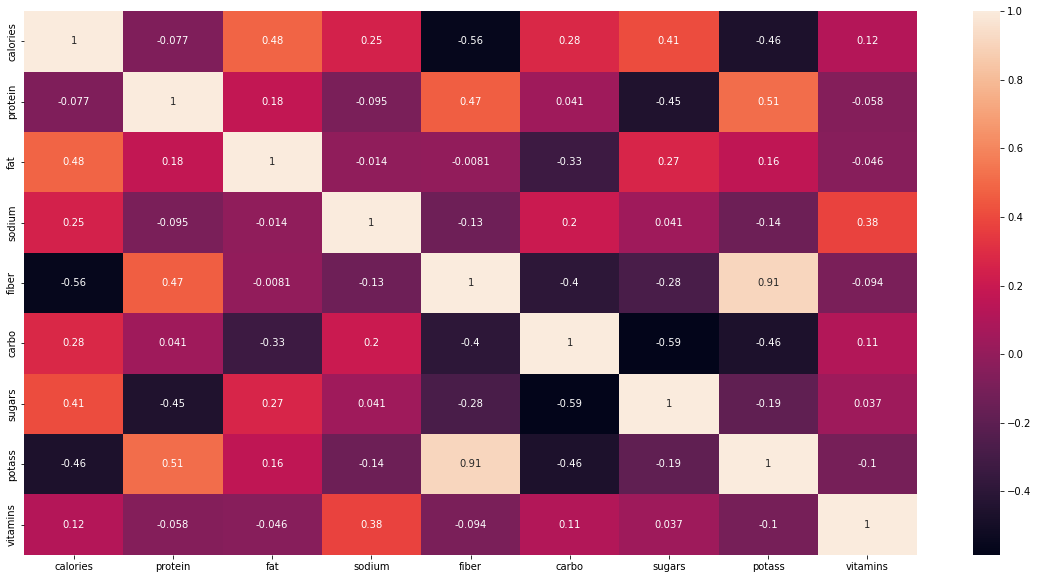

In [97]:
fig = plt.figure(figsize=(20,10))

sns.heatmap(df[metrics].corr(),annot=True);

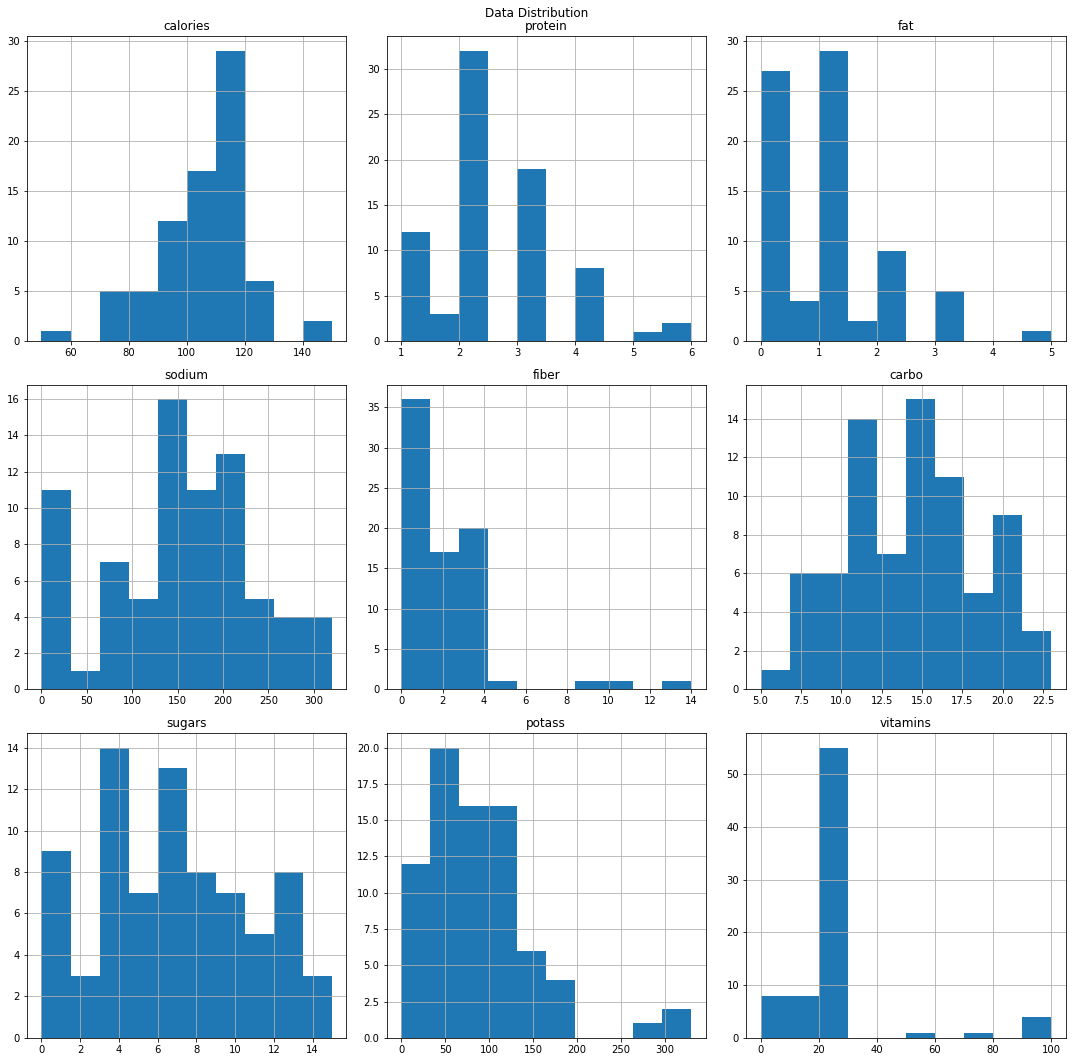

In [115]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for ax,col in zip(axes.flatten(), metrics):
    df[col].hist(ax=ax)
    ax.set_title(col)
plt.suptitle('Data Distribution')
plt.tight_layout();

### Hierarchical Clustering - To see how the algorithm clusters the data itself

In [116]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [119]:
# Standardize the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[metrics])

In [120]:
# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')

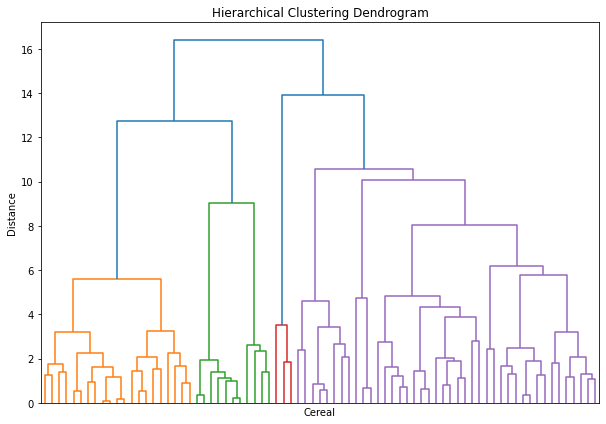

In [124]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cereal')
plt.ylabel('Distance')
plt.show()

In [154]:
# Choose a threshold to cut the dendrogram
threshold = 8

# Create clusters
clusters = fcluster(linked, threshold, criterion='distance')

# Add the cluster assignments to the original dataframe
df['cluster'] = clusters

# Display the first few rows with the cluster assignments
print(df.head())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C      70.0      4.0  1.0   130.0   10.0   
1          100% Natural Bran   Q    C     120.0      3.0  5.0    15.0    2.0   
2                   All-Bran   K    C      70.0      4.0  1.0   260.0    9.0   
3  All-Bran with Extra Fiber   K    C      50.0      4.0  0.0   140.0   14.0   
4             Almond Delight   R    C     110.0      2.0  2.0   200.0    1.0   

   carbo  sugars  potass  vitamins  weight     rating  cluster  
0    5.0     6.0   280.0      25.0     1.0  68.402973        4  
1    8.0     8.0   135.0       0.0     1.0  33.983679        6  
2    7.0     5.0   320.0      25.0     1.0  59.425505        4  
3    8.0     0.0   330.0      25.0     1.0  93.704912        4  
4   14.0     8.0     0.0      25.0     1.0  34.384843        1  


In [155]:
df['cluster'].value_counts(sort=True)

1    21
8    16
7    15
5     8
2     7
3     4
4     3
6     3
Name: cluster, dtype: int64

In [156]:
df[df['cluster']==1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating,cluster
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,0.0,25.0,1.0,34.384843,1
5,Apple Cinnamon Cheerios,G,C,110.0,2.0,2.0,180.0,1.5,10.5,10.0,70.0,25.0,1.0,29.509541,1
6,Apple Jacks,K,C,110.0,2.0,0.0,125.0,1.0,11.0,14.0,30.0,25.0,1.0,33.174094,1
10,Cap'n'Crunch,Q,C,120.0,1.0,2.0,220.0,0.0,12.0,12.0,35.0,25.0,1.0,18.042851,1
12,Cinnamon Toast Crunch,G,C,120.0,1.0,3.0,210.0,0.0,13.0,9.0,45.0,25.0,1.0,19.823573,1
14,Cocoa Puffs,G,C,110.0,1.0,1.0,180.0,0.0,12.0,13.0,55.0,25.0,1.0,22.736446,1
17,Corn Pops,K,C,110.0,1.0,0.0,90.0,1.0,13.0,12.0,20.0,25.0,1.0,35.782791,1
18,Count Chocula,G,C,110.0,1.0,1.0,180.0,0.0,12.0,13.0,65.0,25.0,1.0,22.396513,1
24,Froot Loops,K,C,110.0,2.0,1.0,125.0,1.0,11.0,13.0,30.0,25.0,1.0,32.207582,1
25,Frosted Flakes,K,C,110.0,1.0,0.0,200.0,1.0,14.0,11.0,25.0,25.0,1.0,31.435973,1


In [157]:
df[df['cluster']==2]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating,cluster
15,Corn Chex,R,C,110.0,2.0,0.0,280.0,0.0,22.0,3.0,25.0,25.0,1.0,41.445019,2
16,Corn Flakes,K,C,100.0,2.0,0.0,290.0,1.0,21.0,2.0,35.0,25.0,1.0,45.863324,2
21,Crispix,K,C,110.0,2.0,0.0,220.0,1.0,21.0,3.0,30.0,25.0,1.0,46.895644,2
40,Kix,G,C,110.0,2.0,1.0,260.0,0.0,21.0,3.0,40.0,25.0,1.0,39.241114,2
61,Rice Chex,R,C,110.0,1.0,0.0,240.0,0.0,23.0,2.0,30.0,25.0,1.0,41.998933,2
62,Rice Krispies,K,C,110.0,2.0,0.0,290.0,0.0,22.0,3.0,35.0,25.0,1.0,40.560159,2
72,Triples,G,C,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.0,25.0,1.0,39.106174,2


In [158]:
df[df['cluster']==3]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating,cluster
38,Just Right Crunchy Nuggets,K,C,110.0,2.0,1.0,170.0,1.0,17.0,6.0,60.0,100.0,1.0,36.523683,3
53,Product 19,K,C,100.0,3.0,0.0,320.0,1.0,20.0,3.0,45.0,100.0,1.0,41.503540,3
69,Total Corn Flakes,G,C,110.0,2.0,1.0,200.0,0.0,21.0,3.0,35.0,100.0,1.0,38.839746,3
71,Total Whole Grain,G,C,100.0,3.0,1.0,200.0,3.0,16.0,3.0,110.0,100.0,1.0,46.658844,3


In [159]:
df[df['cluster']==4]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating,cluster
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,1.0,68.402973,4
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,1.0,59.425505,4
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,1.0,93.704912,4


In [160]:
df[df['cluster']==5]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating,cluster
20,Cream of Wheat (Quick),N,H,100.0,3.00,0.0,80.0,1.00,21.00,0.0,0.00,0.0,1.0,64.533816,5
43,Maypo,A,H,100.0,4.00,1.0,0.0,0.00,16.00,3.0,95.00,25.0,1.0,54.850917,5
54,Puffed Rice,Q,C,75.0,1.50,0.0,0.0,0.00,19.50,0.0,22.50,0.0,1.0,60.756112,5
55,Puffed Wheat,Q,C,75.0,3.00,0.0,0.0,1.50,15.00,0.0,75.00,0.0,1.0,63.005645,5
57,Quaker Oatmeal,Q,H,100.0,5.00,2.0,0.0,2.70,19.00,0.7,110.00,0.0,1.0,50.828392,5
63,Shredded Wheat,N,C,93.6,2.34,0.0,0.0,3.51,18.72,0.0,111.15,0.0,1.0,68.235885,5
64,Shredded Wheat 'n'Bran,N,C,90.0,3.00,0.0,0.0,4.00,19.00,0.0,140.00,0.0,1.0,74.472949,5
65,Shredded Wheat spoon size,N,C,90.0,3.00,0.0,0.0,3.00,20.00,0.0,120.00,0.0,1.0,72.801787,5


In [161]:
df[df['cluster']==6]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating,cluster
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,1.0,33.983679,6
44,Muesli Raisins; Dates; & Almonds,R,C,150.0,4.0,3.0,95.0,3.0,16.0,11.0,170.0,25.0,1.0,37.136863,6
45,Muesli Raisins; Peaches; & Pecans,R,C,150.0,4.0,3.0,150.0,3.0,16.0,11.0,170.0,25.0,1.0,34.139765,6


In [162]:
df[df['cluster']==7]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating,cluster
7,Basic 4,G,C,87.1,2.01,1.34,140.7,1.340,12.060,5.36,67.0,16.75,1.0,37.038562,7
9,Bran Flakes,P,C,90.0,3.00,0.00,210.0,5.000,13.000,5.00,190.0,25.00,1.0,53.313813,7
22,Crispy Wheat & Raisins,G,C,100.0,2.00,1.00,140.0,2.000,11.000,10.00,120.0,25.00,1.0,36.176196,7
26,Frosted Mini-Wheats,K,C,100.0,3.00,0.00,0.0,3.000,14.000,7.00,100.0,25.00,1.0,58.345141,7
27,Fruit & Fibre Dates; Walnuts; and Oats,P,C,90.0,2.25,1.50,120.0,3.750,9.000,7.50,150.0,18.75,1.0,40.917047,7
28,Fruitful Bran,K,C,80.4,2.01,0.00,160.8,3.350,9.380,8.04,127.3,16.75,1.0,41.015492,7
39,Just Right Fruit & Nut,K,C,98.0,2.10,0.70,119.0,1.400,14.000,6.30,66.5,70.00,1.0,36.471512,7
46,Mueslix Crispy Blend,K,C,80.0,1.50,1.00,75.0,1.500,8.500,6.50,80.0,12.50,1.0,30.313351,7
49,Nutri-Grain Almond-Raisin,K,C,93.8,2.01,1.34,147.4,2.010,14.070,4.69,87.1,16.75,1.0,40.692320,7
51,Oatmeal Raisin Crisp,G,C,97.5,2.25,1.50,127.5,1.125,10.125,7.50,90.0,18.75,1.0,30.450843,7


In [163]:
df[df['cluster']==8]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating,cluster
8,Bran Chex,R,C,90.0,2.0,1.0,200.0,4.0,15.0,6.0,125.0,25.0,1.0,49.120253,8
11,Cheerios,G,C,110.0,6.0,2.0,290.0,2.0,17.0,1.0,105.0,25.0,1.0,50.764999,8
13,Clusters,G,C,110.0,3.0,2.0,140.0,2.0,13.0,7.0,105.0,25.0,1.0,40.400208,8
19,Cracklin' Oat Bran,K,C,110.0,3.0,3.0,140.0,4.0,10.0,7.0,160.0,25.0,1.0,40.448772,8
23,Double Chex,R,C,100.0,2.0,0.0,190.0,1.0,18.0,5.0,80.0,25.0,1.0,44.330856,8
32,Grape Nuts Flakes,P,C,100.0,3.0,1.0,140.0,3.0,15.0,5.0,85.0,25.0,1.0,52.076897,8
33,Grape-Nuts,P,C,110.0,3.0,0.0,170.0,3.0,17.0,3.0,90.0,25.0,1.0,53.371007,8
34,Great Grains Pecan,P,C,120.0,3.0,3.0,75.0,3.0,13.0,4.0,100.0,25.0,1.0,45.811716,8
41,Life,Q,C,100.0,4.0,2.0,150.0,2.0,12.0,6.0,95.0,25.0,1.0,45.328074,8
47,Multi-Grain Cheerios,G,C,100.0,2.0,1.0,220.0,2.0,15.0,6.0,90.0,25.0,1.0,40.105965,8


In [166]:
df['mfr'].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64